In [2]:
from sklearn.datasets import make_classification

In [10]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12) 

n_samples=1000:

ডেটাসেটে মোট 1000টি নমুনা (স্ম্পল) তৈরি করা হবে।

n_redundant=0:

ডেটাসেটে কোন রিডান্ডেন্ট (অপ্রয়োজনীয়) ফিচার থাকবে না। অর্থাৎ, সমস্ত ফিচারই অনন্য এবং গুরুত্বপূর্ণ হবে।

n_features=2:

প্রতিটি নমুনার 2টি ফিচার থাকবে (যে দুটি বৈশিষ্ট্য দিয়ে শ্রেণীবিভাগ হবে)।

n_clusters_per_class=1:

প্রতিটি ক্লাসের জন্য একটি করে ক্লাস্টার (গুচ্ছ) থাকবে। এটি নির্দেশ করে যে, ডেটার প্রতিটি শ্রেণির মধ্যে একটিমাত্র ক্লাস্টার থাকবে।

weights=[0.90]:

এটি একটি গুরুত্বপূর্ণ প্যারামিটার, যা ক্লাসের মধ্যে ভারসাম্য নির্ধারণ করে। কিন্তু এখানে আপনি শুধুমাত্র একটি মান [0.90] দিয়েছেন। এটি ভুল, কারণ এখানে দুটি ক্লাস থাকতে হবে (মেজোরিটি এবং মাইনোরিটি ক্লাস)। যদি আপনি দুটি ক্লাসের মধ্যে ভারসাম্য রাখতে চান, তবে এটি দুইটি মান নিয়ে আসা উচিত যেমন [0.90, 0.10]। এতে 90% নমুনা মেজোরিটি ক্লাসে থাকবে এবং 10% নমুনা মাইনোরিটি ক্লাসে থাকবে।

random_state=12:

এটি র‍্যান্ডম নম্বর জেনারেটরের স্টেট নির্ধারণ করে, যাতে কোডটি পুনরায় চালানোর সময় একই ডেটাসেট তৈরি হয় (যেমন, র্যান্ডম নমুনা নির্বাচন করার ক্ষেত্রে পুনরায় সঠিক ফলাফল পাওয়া যাবে)।

In [8]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [11]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [12]:
import matplotlib .pyplot as plt

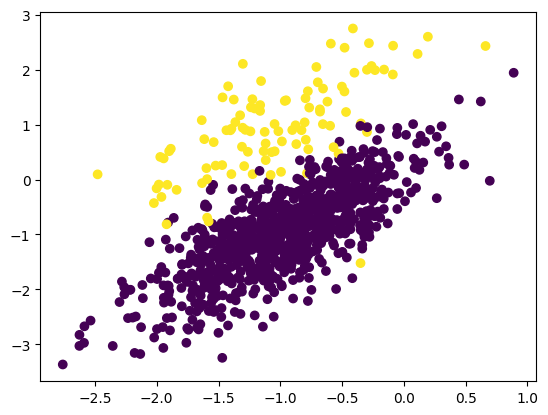

In [13]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [24]:
!pip install imblearn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


pip install imblearn installs the imblearn package, which provides tools to handle imbalanced datasets, such as the SMOTE technique, and various other methods to balance classes in machine learning.

In [25]:
from imblearn.over_sampling import SMOTE



In [26]:
## transform the dataset
oversample=SMOTE()

In [28]:
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [29]:
X.shape

(1800, 2)

In [30]:
y.shape

(1800,)

In [31]:
len(y[y==0])

900

In [32]:
len(y[y==1])

900

In [33]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

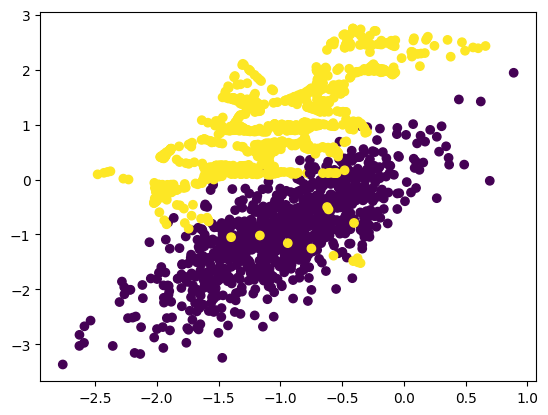

In [34]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])